```
@beelzebruno
2022
```

In [1]:
# Run this cell if used libraries are missing
# ! (uncomment necessary packages first) !

# !pip install pyvis
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
from math import factorial as ft
from math import log
import matplotlib.pyplot as plt
import pandas as pd
from pyvis.network import Network
import seaborn as sns

plt.style.use('seaborn')

## Graph Construction

A graph is a network of points called nodes or **vertices**, which are connected by lines called **edges**.

In python we can represent a graph network from a builtin dictionary type. The dict keys represent the vertices and the dict the value lists the vertice connections, ore in other words, the edges of the node.

In [3]:
# Graph construction
sample_graph = {
    'A': ['B', 'C', 'E'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B', 'E'],
    'E': ['D', 'A']
}

# Graph visualization
sample_net = Network(
    height='350px',
    width='100%',
    bgcolor='#222222',
    font_color='white',
    notebook=True
)
# Add nodes to the network graph
for node in sample_graph:
    sample_net.add_node(node, node, title=node)
    
# link nodes with edges
for node, edges in sample_graph.items():
    for edge in edges:
        sample_net.add_edge(node, edge, value=node)

# View graph
sample_net.show('sample_net.html')

pyvis output:

![pyvis_out_1](https://i.ibb.co/tJ2h05r/Screenshot-at-2022-03-22-18-03-24.png)

This is a very simple and rustic way to do this, let us use a `class` and allow a better manipulation with methods to add and remove nodes and edges. This is a more elegant ~~weapon~~ tool for a more civilized ~~age~~ code

![reference_1](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSA9gQ3twqfMy6VwedEGtd7eAwzoFsKiUl0brRY0acV6qj_RoJJe917mCeWLJDPQJ83fo&usqp=CAU)

In [4]:
class Graph:
    def __init__(self, pydict):
        self._data = pydict
        self.net = Network(
            height='350px',
            width='100%',
            bgcolor='#222222',
            font_color='white',
            notebook=True
        )

    def get_nodes(self):
        """ return a list of all nodes """
        return list(self._data.keys())

    def get_edges(self, node):
        """ return a list of the edges from a node """
        return self._data.get(node)

    def add_node(self, node, edges=None):
        """ Add a node to graph """
        if node in self._data:
            return self.get_nodes()

        if not edges:
            edges = []
        if not isinstance(edges, list):
            raise Exception('Edges must be a list')

        self._data[node] = list(set(edges))  # enforce no duplicates
        return self.get_nodes()

    def add_edge(self, node, edge):
        """ Link a node to a another """
        if node not in self._data:
            self.add_node(node)

        self._data[node].append(edge)
        return self.get_edges(node)

    def plot(self):
        """ Plots the graph visualization """

        for node in self._data:
            self.net.add_node(node, node, title=node)

        for node, edges in self._data.items():
            for edge in edges:
                self.net.add_edge(node, edge, value=node)

        return self.net.show('graph.html')

In [5]:
# Create new Graph
graph = Graph(sample_graph)

# Bind nodes and respective edges to a table format
data = []
for node in graph.get_nodes():
    data.append([node, graph.get_edges(node)])

# Show table for better visualization
pd.DataFrame(data, columns=['Node', 'Edges']).style.hide_index()

Node,Edges
A,"['B', 'C', 'E']"
B,"['A', 'D']"
C,['A']
D,"['B', 'E']"
E,"['D', 'A']"


In [6]:
# Add some more edges and nodes
graph.add_node('Z')
graph.add_node('W')
graph.add_node('X')

graph.add_edge('A', 'Z')
graph.add_edge('W', 'Z')
graph.add_edge('X', 'C')
graph.add_edge('O', 'B')

['B']

In [7]:
# plot graph
graph.plot()

pyvis oputput:

![pyvis_out_2](https://i.ibb.co/9qhJDpD/Screenshot-at-2022-03-22-18-05-14.png)

Thats nice ok, but is not very informative when abstracting to the real world, so let us make a fantasy abstraction to merge the usability ideas:

Suppose we are in a magic land called **Highlands** with many folks living in their towns. One day in a one small town called **Case Town** where The **Case Folks** live. 

In a warm sunny day on this little town, a white **Snow Mage** who traveled from the far lands of the **Arcadia** comes to visit a little friend. The mage brought 7 little dwarf friends which are natural from the deep caves of **Loria**, with a proposal, to reach the mountains of **Vault Gisley** for a quest: "to stole gold from a dragon". There are many possible ways to reach the mountain, with many dangers in the way. They must choose the shortest path to reach the mountain.

<br />

![highlands_map](https://i.ibb.co/r4njkvT/highlands-map.png)

<br />

Let us set some distances levels to the edges that connect this magic land towns, we can do that from python by a dict of dicts:

In [8]:
highlands_distances = {
    'Case Town': {
        'Case Town': 0,
        'Alexandrea': 100,
        'Por Town': 322
    },
    'Alexandrea': {
        'Alexandrea': 0,
        'Case Town': 100
    },
    'Por Town': {
        'Por Town': 0,
        'Case Town': 322,
        'Fisherman House': 82,
        'Loria': 476,
        'Sonospla': 790
    },
    'Fisherman House': {
        'Fisherman House': 0,
        'Island Tower': 56,
        'Por Town': 82
    },
    'Island Tower': {
        'Island Tower': 0,
        'Fisherman House': 56
    },
    'Loria': {
        'Loria': 0,
        'Por Town': 476,
        'Sonospla': 54,
        'Goblin Dew': 233
    },
    'Sonospla': {
        'Sonospla': 0,
        'Loria': 54,
        'Por Town': 790,
        'Caravan': 87,
        'Desert Fortress': 80
    },
    'Caravan': {
        'Caravan': 0,
        'Sonospla': 87,
        'Desert Fortress': 30,        
    },
    'Desert Fortress': {
        'Desert Fortress': 0,
        'Caravan': 30,
        'Arcadia': 88,
        'Malma City': 78,
        'Sonospla': 80,
        'Vault Gisley': 300
    },
    'Arcadia': {
        'Arcadia': 0,
        'Desert Fortress': 88,
        'Malma City': 13,
    },
    'Malma City': {
        'Malma City': 0,
        'Arcadia': 13,
        'Desert Fortress': 78,
        'Vault Gisley': 234
    },
    'Goblin Dew': {
        'Goblin Dew': 0,
        'Loria': 233,
        'Lokiana Town': 23,
        'Elfenheim': 54,
    },
    'Lokiana Town': {
        'Lokiana Town': 0,
        'Goblin Dew': 23,
        'Elfenheim': 10,
        'Gomorra': 120
    },
    'Elfenheim': {
        'Elfenheim': 0,
        'Lokiana Town': 10,
        'Goblin Dew': 54,
        'Gomorra': 100
    },
    'Gomorra': {
        'Gomorra': 0,
        'Lokiana Town': 10,
        'Elfenheim': 100,
        'Orcs Camp': 30
    },
    'Orcs Camp': {
        'Orcs Camp': 0,
        'Gomorra': 30,
        'Vault Gisley': 8
    },
    'Vault Gisley': {
        'Vault Gisley': 0,
        'Orcs Camp': 8,
        'Desert Fortress': 300,
        'Malma City': 234
    }
}

In [9]:
# Create new Graph
highlands_graph = Graph(highlands_distances)

# Bind nodes and respective edges to a table format
data = []
for node in highlands_graph.get_nodes():
    data.append([node, list(highlands_graph.get_edges(node))])

# Show table for better visualization
pd.DataFrame(data, columns=['Node', 'Edges']).style.hide_index()

Node,Edges
Case Town,"['Case Town', 'Alexandrea', 'Por Town']"
Alexandrea,"['Alexandrea', 'Case Town']"
Por Town,"['Por Town', 'Case Town', 'Fisherman House', 'Loria', 'Sonospla']"
Fisherman House,"['Fisherman House', 'Island Tower', 'Por Town']"
Island Tower,"['Island Tower', 'Fisherman House']"
Loria,"['Loria', 'Por Town', 'Sonospla', 'Goblin Dew']"
Sonospla,"['Sonospla', 'Loria', 'Por Town', 'Caravan', 'Desert Fortress']"
Caravan,"['Caravan', 'Sonospla', 'Desert Fortress']"
Desert Fortress,"['Desert Fortress', 'Caravan', 'Arcadia', 'Malma City', 'Sonospla', 'Vault Gisley']"
Arcadia,"['Arcadia', 'Desert Fortress', 'Malma City']"


In [10]:
highlands_graph.plot()

pyvis out:
![highlands_graphvis](https://i.ibb.co/8Mnr6GG/Captura-de-Tela-2022-03-26-a-s-11-15-16.png)

## Queue

Queue is a data-controller structure based on the FIFO (First-In, First-Out) premisse, where the elements are "stacked" one behind another, and the first element in the front of the queue are called, processed and then removed from the queue. This structure is needed to some of our search algorithms.

<br />

<img src="https://miro.medium.com/max/1400/1*zSjPOiijgcuCPvNcYdq_XQ.jpeg" align="center" width="400" alt="Project icon">

<br />

In [11]:
class Queue:
    def __init__(self, *elements):
        self._elements = list(elements)

    def empty(self):
        return not bool(self._elements)
        
    def next(self):
        if self.empty():
            raise Exception('The queue is empty!')
        return self._elements.pop(0)

    def insert(self, element):
        self._elements.append(element)

    def length(self):
        return len(self._elements)

    def show(self, n=None):
        if not n:
            return self._elements
        return self._elements[:n]

    def __repr__(self):
        return str(self._elements)

    def __str__(self):
        return str(self._elements)


## Breadth-first search

The breadth-first algorithm searches for the shallow next neighboors first. Starting from a initial node, we get all of his childs, and check all childs to test if one of them corresponds to our goal. In our dantasy abstraction, we are starting on **Case Town**. The *Case Town* **childs** are **Alexandrea** and **Por Town**, so the algorith will check both and compare if it is our goal (**Vault Gisley**), as none of them are our goal the algorithm will keep checking for the child of the childs, so it will test if the children of **Alexandrea** contains our goal, then the childs of **Por Town**. If none of them ar, the algorithms will keep the same logic, comparing child by child.

<br />

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Breadth-First-Search-Algorithm.gif" align="center" width="200" alt="Project icon">


<br />

Below there is a breadth-first search function based upon the pseudocode at [Russel & Norvig (2013)](https://www.amazon.com/Artificial-Intelligence-Modern-Approach-3rd/dp/0136042597):

In [39]:
def breadth_first_search(graph, initial_node, goal_node):
    node = initial_node
    # starts a queue by the initial node
    queue = Queue(*graph.get_edges(initial_node))
    explored = []
    solution = {'total_distance': 0}

    # the steps and `i` variable are used to measure the big-O complexity
    steps = []
    i = 1
    breadth_graph = Graph({})

    while not queue.empty():
        steps.append(i)
        i += i

        node = queue.next()
        explored.append(node)
        breadth_graph.add_node(node)

        for child in graph.get_edges(node):
            i += i
            steps.append(i)
            if child in explored:
                continue

            breadth_graph.add_node(child)
            breadth_graph.add_edge(node, child)
            explored.append(child)

            if child == goal_node:
                path = []
                for town in explored:
                    i += i
                    steps.append(i)
                    if town not in path:
                        path.append(town)

                solution['path'] = path
                solution['full_path'] = explored
                solution['graph'] = breadth_graph
                solution['steps'] = steps
                return solution

            solution['total_distance'] += graph.get_edges(node)[child]
            queue.insert(child)

In [40]:
breadth_result = breadth_first_search(highlands_graph, 'Case Town', 'Vault Gisley')

# Show table for better visualization
path =  ' --> '.join(breadth_result['path'])
pd.DataFrame(
    [
        'Path: ', path,
        'Steps:', len(breadth_result['steps']),
        'Total distance:', breadth_result["total_distance"]
    ],
    columns=['Results']).style.hide_index()

Results
Path:
Case Town --> Alexandrea --> Por Town --> Fisherman House --> Loria --> Sonospla --> Island Tower --> Goblin Dew --> Caravan --> Desert Fortress --> Lokiana Town --> Elfenheim --> Arcadia --> Malma City --> Vault Gisley
Steps:
82
Total distance:
2469


In [41]:
breadth_result['graph'].plot()

pyvis out:
![breadth_tree](https://i.ibb.co/wQwtmC3/Captura-de-Tela-2022-03-28-a-s-21-11-50.png)

This search may repeat nodes until it finds the goal, no mathers the distance cost, it only searches for the goal itself, so this isnt the best choice algorith for our little friends to take the shortest path to reach the dragon mountain, by plotting the path it is possible to see that the connections may not make sense (Arcadia isnt linked to Elfenheim), because the repetition visits are ommited:

In [15]:
# Graph visualization
result_net = Network(
    height='350px',
    width='100%',
    bgcolor='#222222',
    font_color='white',
    notebook=True
)
# Add nodes to the network graph
for node in breadth_result['path']:
    result_net.add_node(node, node, title=node)
    
# link nodes with edges
last = breadth_result['path'][0]
for node in breadth_result['path']:
    result_net.add_edge(node, last, value=node)
    last = node

# View graph
result_net.show('result_net.html')

pyvis out: ![result_connection_path](https://i.ibb.co/crcQjBC/Screenshot-at-2022-03-28-16-43-52.png)

It can be seen through the growth of the algorithm that it is a quadractic time complexity **O(n^2)** since `n` becomes exponential:

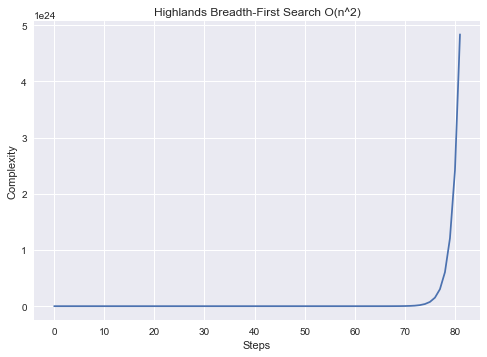

In [16]:
plt.plot(breadth_result['steps'])
plt.xlabel('Steps')
plt.ylabel('Complexity')
plt.title('Highlands Breadth-First Search O(n^2)')
plt.show()

## Depth-first search

The depth-first search algorthm always searches in the deepest childs nodes first. If the goal is not found on the child, then returns to the top root node and search deep on the childs of the upper neighboor.

<img src="https://wiki.gladiabots.com/images/7/7f/Depth-First-Search.gif" align="center" width="200" alt="Project icon">



<br />

To make the implementation possible it is needed to define a **heap** structure, which is based on the LIFO (Last-in, First-out) premisse. This structure stacks elements over =, and removes the top one (the last inserted item) from the heap to be processed.

<img src="https://previews.123rf.com/images/hanhanpeggy/hanhanpeggy0907/hanhanpeggy090700073/5212191-heap-of-plates.jpg" align="center" width="200" alt="Project icon">




In [17]:
class Heap:
    def __init__(self, *elements):
        self._items = [i for i in elements]

    @property
    def empty(self):
        """ Checks if heap queue is empty """
        return not self._items
        
    def insert(self, item):
        """ Inserts an item on the heap queue """
        self._items.append(item)

    def next(self):
        """ Returns top item from the stack """
        if self.empty:
            raise Exception('HeapQueue is empty!')
        return  self._items.pop(-1)

    def __repr__(self):
        return str(self._items)

    def __str__(self):
        return self._items

In [18]:
def depth_first_search(graph, initial_node, goal_node):
    heap = Heap(*graph.get_edges(initial_node))
    explored = []
    solution = {'total_distance': 0}
    depth_graph = Graph({})

    # complexity measurement variables
    i = 1
    steps = []

    while not heap.empty:
        steps.append(i)
        i += i

        node = heap.next()
        explored.append(node)
        depth_graph.add_node(node)

        for child in graph.get_edges(node):
            i += i
            steps.append(i)
            if child in explored:
                continue
            explored.append(child)
            depth_graph.add_node(child)
            depth_graph.add_edge(node, child)
            
            if child == goal_node:
                path = []
                for town in explored:
                    i += i
                    steps.append(i)
                    if town not in path:
                        path.append(town)

                solution['path'] = path
                solution['full_path'] = explored
                solution['graph'] = depth_graph
                solution['steps'] = steps
                return solution

            solution['total_distance'] += graph.get_edges(node)[child]
            heap.insert(child)

In [19]:
depth_result = depth_first_search(highlands_graph, 'Case Town', 'Vault Gisley')

# Show table for better visualization
path =  ' --> '.join(depth_result['full_path'])
pd.DataFrame(
    [
        'Path: ', path,
        'Steps:', len(depth_result['steps']),
        'Total distance:', depth_result["total_distance"]
    ],
    columns=['Results']).style.hide_index()

Results
Path:
Por Town --> Case Town --> Fisherman House --> Loria --> Sonospla --> Sonospla --> Caravan --> Desert Fortress --> Desert Fortress --> Arcadia --> Malma City --> Vault Gisley
Steps:
31
Total distance:
2003


In [20]:
breadth_result['graph'].plot()

pyvis out: ![depth_tree_plot](https://i.ibb.co/sPjNdMr/Screenshot-at-2022-03-29-11-55-23.png)

In [21]:
# Graph visualization
result_net = Network(
    height='350px',
    width='100%',
    bgcolor='#222222',
    font_color='white',
    notebook=True
)
# Add nodes to the network graph
for node in depth_result['path']:
    result_net.add_node(node, node, title=node)
    
# link nodes with edges
last = depth_result['path'][0]
for node in depth_result['path']:
    result_net.add_edge(node, last, value=node)
    last = node

# View graph
result_net.show('result_net.html')

pyvis out:
![depth_path](https://i.ibb.co/PFvKBs2/Screenshot-at-2022-03-29-13-06-01.png)

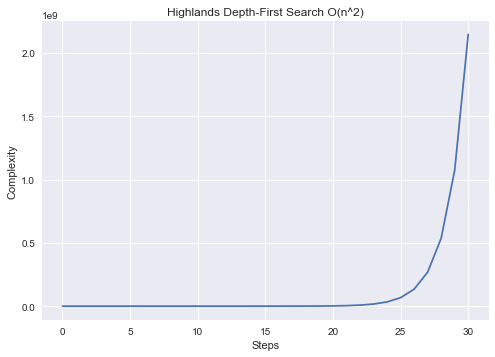

In [22]:
plt.plot(depth_result['steps'])
plt.xlabel('Steps')
plt.ylabel('Complexity')
plt.title('Highlands Depth-First Search O(n^2)')
plt.show()

## A* search

The `A*` algorithm searches for the best path to our goal through based on an previous information called *heuristic*, which is an assumption about the cheaper or shorter way to reach the goal. Also, to decide to which node the algoerithm should proceed next, a **cost function** is used to calculate the cheaper way to take. The function uses the heuristic value to the goal plus the cost value to the next node:

\begin{equation}
 f(x) = g(n) + h(n)
\end{equation}

where **g(n)** is the cost to the next node and **h(n)** is the heuristic.

<img src="https://i.imgur.com/omT9FmV.gif" align="center" width="200" alt="Project icon">


### Priority Queue

To implement the `A*` it will be needed to build a **priority queue**. The priority queue holds a sequence of items sorted by ascending **f(x)** value. It behaves like a normal queue, removing elements from the front (first) position in the queue, the difference lies in the position a new element receives on the stack when inserted on the queue.

<img src="https://adrianmejia.com/images/priority-queue-pq-heap.png" align="center" width="300" alt="Project icon">



In [23]:
class PriorityQueue:
    def __init__(self, *elements):
        self._items = self.requeue(elements)

    @property
    def empty(self):
        """ Checks if queue is empty """
        return not self._items

    def requeue(self, elements):
        """ Reorganizes the queue base on the lowest value """
        self._items = sorted(elements, key=lambda i: i[1])
        return list(self._items)
    
    def insert(self, item):
        """ Insert a nem element on the queue and requeue items """
        self._items.append(item)
        return self.requeue(self._items)
    
    def next(self):
        """ Return the first element in the queue """
        return self._items.pop(0)

    def __repr__(self):
        return str(self._items)

    def __str__(self):
        return str(self._items)

## Heuristic

Suppose we know a medium distance from each town to our goal, this will be  our heuristic:

In [24]:
distances = {
        'Case Town': 266,
        'Alexandrea': 280,
        'Por Town': 240,
        'Fisherman House': 259,
        'Island Tower': 276,
        'Loria': 230,
        'Sonospla': 226,
        'Caravan': 222,
        'Desert Fortress': 210,
        'Arcadia': 190,
        'Malma City': 150,
        'Goblin Dew': 130,
        'Lokiana Town': 110,
        'Elfenheim': 60, 
        'Gomorra': 30,
        'Orcs Camp': 8,
        'Vault Gisley': 0
    }

def heuristic(node_name):
    """ Returns the heuristic h(n) to the goal """
    return distances[node_name]


def cost_function(node_name, cost):
    """ Returns the total movement cost f(x) to the next node """
    return heuristic(node_name) + cost

In [49]:
def a_star(graph, initial_node, goal_node):
    start = [(initial_node, cost_function(initial_node, 0))]
    queue = PriorityQueue(*start)
    explored = []
    solution = {'total_distance': 0}
    astar_graph = Graph({})

    # complexity measurement variables
    i = 1
    steps = []

    while not queue.empty:
        node_name, f_cost = queue.next()
        explored.append(node_name)
        astar_graph.add_node(node_name)

        solution['full_path'] = explored
        solution['graph'] = astar_graph
        solution['steps'] = steps
        
        if node_name == goal_node:
            path = []
            for town in explored:
                i += i
                steps.append(i)
                if town not in path:
                    path.append(town)
            solution['path'] = path
            return solution

        for child_name, cost in graph.get_edges(node_name).items():
            # complexity counter
            i += i
            steps.append(i)
            
            if child_name in explored:
                continue

            astar_graph.add_node(child_name)
            astar_graph.add_edge(node_name, child_name)
            f_cost = cost_function(child_name, cost)

            if child_name not in [k[0] for k in queue._items]:
                queue.insert((child_name, f_cost))
            else:
                for n, v in queue._items:
                    i += i
                    if child_name == n and f_cost > v:
                        queue._items[queue._items.index((n, v))] = (n, f_cost)

            solution['total_distance'] += cost
            queue.requeue(queue._items)

        steps.append(i)
        i += i
    return solution

In [50]:
astar_result = a_star(highlands_graph, 'Case Town', 'Vault Gisley')

# Show table for better visualization
pd.DataFrame(
    [
        'Path: ', ' --> '.join(astar_result['full_path']),
        'Steps:', len(astar_result['steps']),
        'Total distance:', astar_result['total_distance']
    ],
    columns=['Results']).style.hide_index()

Results
Path:
Case Town --> Alexandrea --> Por Town --> Fisherman House --> Island Tower --> Loria --> Goblin Dew --> Elfenheim --> Gomorra --> Orcs Camp --> Vault Gisley
Steps:
55
Total distance:
2348


In [27]:
astar_result['graph'].plot()

pyvis out:
![astar_tree](https://i.ibb.co/3v6WNpD/Captura-de-Tela-2022-03-29-a-s-23-31-39.png)

In [28]:
# Graph visualization
result_net = Network(
    height='350px',
    width='100%',
    bgcolor='#222222',
    font_color='white',
    notebook=True
)
# Add nodes to the network graph
for node in astar_result['path']:
    result_net.add_node(node, node, title=node)
    
# link nodes with edges
last = astar_result['path'][0]
for node in astar_result['path']:
    result_net.add_edge(node, last, value=node)
    last = node

# View graph
result_net.show('result_net.html')

pyvis out:
![astar_path](https://i.ibb.co/zZwKD4T/Captura-de-Tela-2022-03-29-a-s-23-49-17.png)

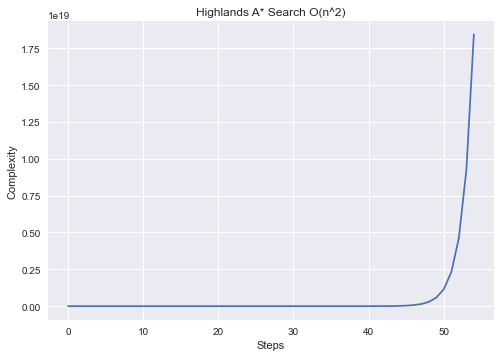

In [29]:
plt.plot(astar_result['steps'])
plt.xlabel('Steps')
plt.ylabel('Complexity')
plt.title('Highlands A* Search O(n^2)')
plt.show()

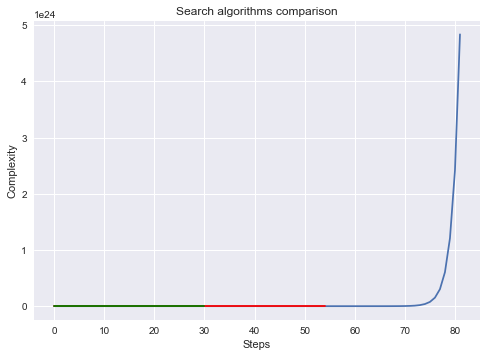

In [56]:
plt.plot(breadth_result['steps'])
plt.plot(astar_result['steps'], color='red')
plt.plot(depth_result['steps'], color='green')
plt.xlabel('Steps')
plt.ylabel('Complexity')
plt.title('Search algorithms comparison')
plt.show()

## References

<br />

[RUSSEL, Stuart; NORVIG, Peter. **Artificial Intelligence**: A modern approach. 3. ed., 2013;](https://www.amazon.com/Artificial-Intelligence-Modern-Approach-3rd/dp/0136042597)